# Linear Regression

### Preliminaries

- Goal 
  - Maximum likelihood estimates for various linear regression variants
- Materials        
  - Mandatory
    - These lecture notes
  - Optional
    - Bishop pp. 140-144 
    - [G. Deng et al., _A model-based approach for the development of LMS algorithms_', ISCAS-05 symposium, 2005](./files/Deng-2005-A-model-based-approach-for-the-development-of-LMS-algorithms.pdf).

### Regression - Illustration


<img src="./figures/fig-bishop12.png" width="300px">

Given a set of (noisy) data measurements, find the 'best' relation between an input variable $x \in \mathbb{R}^D$ and input-dependent outcomes $y \in \mathbb{R}$


### Regression vs Density Estimation


- Observe $N$ IID data **pairs** $D=\{(x_1,y_1),\dotsc,(x_N,y_N)\}$ with $x_n \in \mathbb{R}^D$ and $y_n \in \mathbb{R}$.

- <span style="color:blue">[Q.]</span> We could try to build a model for the data by density estimation, $p(x,y)$, but what if we are interested only in (a model for) the responses $y_n$ for **given inputs** $x_n$?

- <span style="color:blue">[A.]</span> We will build a model only for the conditional distribution $p(y|x)$. 
  - Note that, since $p(x,y)=p(y|x)\, p(x)$, this is a building block for the joint data density.
  - In a sense, this is density modeling with the assumption that $x$ is drawn from a uniform distribution.

- Next, we discuss model (1) specification, (2) ML estimation and (3) prediction for the linear regression model. 
 

###  1. Model Specification for Linear Regression


- In a _regression_ model, we try to 'explain the data' by a purely deterministic term $f(x,w)$, plus a purely random term $\epsilon_n$ for 'unexplained noise',

    $$
    y_n  = f(x_n,w) + \epsilon_n
    $$

-  In _linear regression_, we assume that 

$$f(x,w)=w^T x \,.$$

-  In _ordinary linear regression_, the noise process $\epsilon_n$ is zero-mean Gaussian with constant variance $\sigma^2$, i.e.

$$
y_n  = w^T x_n  + \mathcal{N}(0,\sigma^2) \,,
$$
or equivalently, the likelihood model is 
$$
p(y_n|\,x_n,w) = \mathcal{N}(y_n|\,w^T x_n,\sigma^2) \,.
$$

- For full Bayesian learning we should also choose a prior $p(w)$; In ML estimation, the prior $p(w)$ is uniformly distributed (so it can be ignored).

<!--- 
%$y_n$ is Gaussian around $\theta^T x_n$ with `unexplained' noise $\sigma^2$.
% -   Note that 1st term RHS is purely deterministic; 2nd term is purely random and independent of $x_n$
%-  Choose a prior over the parameters (possibly flat: $\sigma\rightarrow \infty$)
-->

###  2. ML Estimation for Linear Regression Model

- Let's work out the log-likelihood for multiple observations
$$\begin{align*}
\log p(D|w) &\stackrel{\text{IID}}{=} \sum_n \log \mathcal{N}(y_n|\,w^T x_n,\sigma^2) \propto -\frac{1}{2\sigma^2} \sum_{n} {(y_n - w^T x_n)^2}\\
    &= -\frac{1}{2\sigma^2}\left( {y - \mathbf{X}w } \right)^T \left( {y - \mathbf{X} w } \right)
\end{align*}$$
where  we defined $N\times 1$ vector $y  = \left(y_1 ,y_2 , \ldots ,y_N \right)^T$ and $(N\times D)$-dim matrix $\mathbf{X}  = \left( x_1 ,x_2 , \ldots ,x_n \right)^T$.

-  Set the derivative $\nabla_{w} \log p(D|w) = \frac{1}{\sigma^2} \mathbf{X}^T(y-\mathbf{X} w)$ to zero for
the maximum likelihood estimate
$$\begin{equation*}
\boxed{\hat w_{\text{ML}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T y}
\end{equation*}$$

-  The matrix $\mathbf{X}^\dagger \equiv  (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T$ is also known as the **Moore-Penrose pseudo-inverse** (which is sort-of-an-inverse for non-square matrices).

-  Note that size ($N\times D$) of the data matrix $\mathbf{X}$ grows with number of observations, but the size ($D\times D$) of $\mathbf{X}^T\mathbf{X}$ is independent of training data set.

### 3. Prediction of New Data Points 

- Now, we want to apply the trained model. New data points can be predicted by
$$\begin{equation*}
p(y_\bullet \,|\, x_\bullet,\hat w_{\text{ML}}) = \mathcal{N}(y_\bullet \,|\, \hat w_{\text{ML}}^T x_\bullet, \sigma^2 ) 
\end{equation*}$$

- Note that the expected value of a predicted new data point

$$
\mathrm{E}[y_\bullet] = \hat w_{\text{ML}}^T x_\bullet = x_\bullet^T \hat{w}_{\text{ML}} = \left( x_\bullet^T \mathbf{X}^\dagger \right) y
$$

can also be expressed as a linear combination of the observed data points 

$$y  = \left( {y_1 ,y_1 , \ldots ,y_N } \right)^T \,.$$

###  Deterministic Least-Squares Regression

-  (You may say that) we don't need to work with probabilistic models. E.g., there's also the deterministic **least-squares** solution: minimize sum of squared errors,
$$\begin{align*} \hat w_{\text{LS}} &= \arg\min_{w} \sum_n {\left( {y_n  - w ^T x_n } \right)} ^2 
  = \arg\min_{w} \left( {y - \mathbf{X}w } \right)^T \left( {y - \mathbf{X} w } \right)
\end{align*}$$

-  Setting the gradient 
$ \frac{\partial \left( {y - \mathbf{X}w } \right)^T \left( {y - \mathbf{X}w } \right)}{\partial w} = -2 \mathbf{X}^T \left(y - \mathbf{X} w  \right)
$ to zero yields the **normal equations** 
$\mathbf{X}^T\mathbf{X} \hat w_{\text{LS}} = \mathbf{X}^T y$  and consequently
$$
\boxed{\hat w_{\text{LS}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T y} 
$$
which is the same answer as we got for the maximum likelihood weights $\hat w_{\text{ML}}$.

- $\Rightarrow$ Least-squares regression ($\hat w_{\text{LS}}$) corresponds to (probabilistic) maximum likelihood ($\hat w_{\text{ML}}$) if 
  1. **IID samples** (determines how errors are combined), and
  1.  Noise $\epsilon_n \sim \mathcal{N}(0,\,\sigma^2)$ is **Gaussian** (determines error metric)      
  

###  Probabilistic vs. Deterministic Approach

-  The (deterministic) least-squares approach assumed IID Gaussian distributed data, but these assumptions are not obvious from looking at the least-squares (LS) criterion.

-  If the data were better modeled by non-Gaussian assumptions (or not IID), then LS might not be appropriate.

-  The probabilistic approach makes all these issues completely transparent by focusing on the **model specification** rather than the error criterion.

-  Next, we will show this by two examples: (1) samples not identically distributed, and (2) few data points.

###  Not Identically Distributed Data

-  What if we assume that the variance of the measurement error varies with the sampling index,  $\epsilon_n \sim \mathcal{N}(0,\sigma_n^2)$?

- Let's make the log-likelihood again (use $\Lambda \triangleq \mathrm{diag}[1/\sigma_n^2]$): 
$$\begin{align*}
\mathrm{L(w)} &\triangleq \log p(D|w) 
  \propto -\frac{1}{2} \sum_n \frac{(y_n-w^T x_n)^2}{\sigma_n^2} = -\frac{1}{2} (y- \mathbf{X}w)^T \Lambda (y- \mathbf{X} w)\,.
\end{align*}$$

-  Set derivative $\partial \mathrm{L(w)} / \partial w = -\mathbf{X}^T\Lambda (y-\mathbf{X} w)$
to zero to get the **normal equations** 
$\mathbf{X}^T \Lambda \mathbf{X} \hat{w}_{\text{WLS}} = \mathbf{X}^T \Lambda y$ 
and consequently 
$$ \boxed{\hat{w}_{\text{WLS}} = \left(\mathbf{X}^T \Lambda \mathbf{X}\right)^{-1} \mathbf{X}^T \Lambda y}$$ 

-  This is also called the **Weighted Least Squares** (WLS) solution. (Note that we just stumbled upon it, the crucial aspect is appropriate model specification!)

-  Note also that the dimension of $\Lambda$ grows with the number of data points. In general, models for which the number of parameters grow as the number of observations increase are called **non-parametric models**.

#### CODE EXAMPLE

We'll compare the Least Squares and Weighted Least Squares solutions for a simple linear regression model with input-dependent noise:

$$\begin{align*}
x &\sim \text{Unif}[0,1]\\
y|x &\sim \mathcal{N}(f(x), v(x))\\
f(x) &= 5x - 2\\
v(x) &= 10e^{2x^2}-9.5\\
\mathcal{D} &= \{(x_1,y_1),\ldots,(x_N,y_N)\}
\end{align*}$$

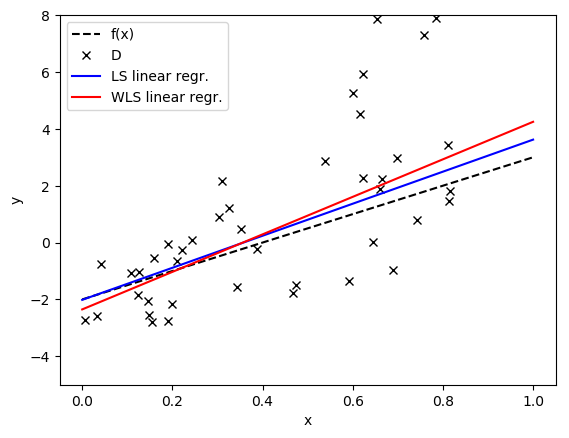

In [1]:
using PyPlot, LinearAlgebra

# Model specification: y|x ~ 𝒩(f(x), v(x))
f(x) = 5*x .- 2 
v(x) = 10*exp.(2*x.^2) .- 9.5 # input dependent noise variance
x_test = [0.0, 1.0]
plot(x_test, f(x_test), "k--") # plot f(x)

# Generate N samples (x,y), where x ~ Unif[0,1]
N = 50
x = rand(N)
y = f(x) + sqrt.(v(x)) .* randn(N)
plot(x, y, "kx"); xlabel("x"); ylabel("y") # Plot samples

# Add constant to input so we can estimate both the offset and the slope
_x = [x ones(N)]
_x_test = hcat(x_test, ones(2))

# LS regression
w_ls = pinv(_x) * y
plot(x_test, _x_test*w_ls, "b-") # plot LS solution

# Weighted LS regression
W = Diagonal(1 ./ v(x)) # weight matrix
w_wls = inv(_x'*W*_x) * _x' * W * y
plot(x_test, _x_test*w_wls, "r-") # plot WLS solution
ylim([-5,8]); legend(["f(x)", "D", "LS linear regr.", "WLS linear regr."],loc=2);

###  Too Few Training Samples

-  If we have fewer training samples than input dimensions, $\mathbf{X}^T\mathbf{X}$ will not be invertible. (Why?)

-  As a general recipe, in case of (expected) problems, **go back to full Bayesian!** Do proper model specification, Bayesian inference etc. Let's do this next. 

-  **Model specification**. Let's try a Gaussian prior for $w$ (why is this reasonable?)

$$
p(w) = \mathcal{N}(w|0,\Sigma) = \mathcal{N}(w|0,\varepsilon I)
$$

-  **Learning**. Let's do Bayesian inference,

$$\begin{align*}
\log p(w|D) &\propto \log p(D|w)p(w) \\
   &\stackrel{IID}{=} \log \sum_n p(y_n|x_n,w) + \log p(w)\\
   &= \log \sum_n \mathcal{N}(y_n|\,w^Tx_n,\sigma^2) + \log \mathcal{N}(w|0,\varepsilon I)\\
   &\propto \frac{1}{2\sigma^2}\left( {y - \mathbf{X}w } \right)^T \left( {y - \mathbf{X}w } \right)  + \frac{1}{2 \epsilon}w^T w
\end{align*}$$

-  **Done!** The posterior $p(w|D)$ specifies all we know about $w$ after seeing the data.

###  Too Few Training Samples, cont'd: the MAP estimate

- As discussed, for practical purposes, you often want a point estimate for $w$, rather than a posterior distribution.

-  For instance, let's take a **Maximum A Posteriori (MAP) estimate**. Set derivative 
$$\nabla_{w} \log p(w|D) = -\frac{1}{\sigma^2}\mathbf{X}^T(y-\mathbf{X}w) + \frac{1}{\varepsilon} w
$$ 
to zero, yielding
$$
\boxed{ \hat{w}_{\text{MAP}} = \left( \mathbf{X}^T\mathbf{X} + \frac{\sigma^2}{\varepsilon} I \right)^{-1}\mathbf{X}^T y }
$$

- Note that, in contrast to $\mathbf{X}^T\mathbf{X}$, the matrix $\left( \mathbf{X}^T\mathbf{X} + (\sigma^2 / \varepsilon) I \right)$ is always invertible! (Why?)

- Note also that $\hat{w}_{\text{LS}}$ is retrieved by letting $\varepsilon  \rightarrow \infty$. Does that make sense?

###  Adaptive Linear Regression

-  What if the data arrives one point at a time?

-  Two standard _adaptive_ linear regression approaches: RLS and LMS. Here we shortly recap the LMS approach.

-  **Least Mean Squares** (LMS) is gradient-descent on a 'local-in-time' approximation of the square-error cost function.

-  Define the cost-of-current-sample as  
$$\begin{equation*}
E_n(w) = \frac{1}{2}(y_n - w^Tx_n)^2
\end{equation*}$$ 
and track the optimum by gradient descent (at each sample index $n$):
$$\begin{equation*}
w_{n+1} = w_n - \eta \, \left. \frac{\partial E_n}{\partial w} \right|_{w_n}
\end{equation*}$$
which leads to the LMS update:
$$
\boxed{ w_{n+1} = w_n + \eta \, (y_n - w_n^T x_n) x_n }
$$

-  <span style="color:red">(OPTIONAL)</span> This is not a probabilistic modelling derivation. Is there also a Bayesian treatment of LMS? Sure, e.g., have a look at [G. Deng et al., _A model-based approach for the development of LMS algorithms_', ISCAS-05 symposium, 2005](./files/Deng-2005-A-model-based-approach-for-the-development-of-LMS-algorithms.pdf).

---
The cell below loads the style file

In [2]:
open("../../styles/aipstyle.html") do f
    display("text/html", read(f, String))
end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->